In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create a reference to the CSV and import it into a Pandas DataFrame
csv_path = "Resources/pollution_us_2000_2016.csv"
df = pd.read_csv(csv_path)

In [3]:
#pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
#efficient way to extract year from string format date
df['year'] = pd.DatetimeIndex(df['Date Local']).year
df['month'] = pd.DatetimeIndex(df['Date Local']).month
df['day'] = pd.DatetimeIndex(df['Date Local']).day
df['Date Local'] = pd.to_datetime(df['Date Local'],format='%Y-%m-%d') 

In [4]:
# Delete extraneous column
df = df.drop(['Unnamed: 0','State Code','County Code','Address','Site Num','NO2 Units','O3 Units','SO2 Units','CO Units'], axis=1)
# Removing Mexico
df = df[df.State!='Country Of Mexico']
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year,month,day
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,9.0,21,13.0,1.145833,4.2,21,NaN,2000,1,1
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,9.0,21,13.0,0.878947,2.2,23,25.0,2000,1,1
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,6.6,23,NaN,1.145833,4.2,21,NaN,2000,1,1
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,6.6,23,NaN,0.878947,2.2,23,25.0,2000,1,1
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,...,3.0,22,4.0,0.850000,1.6,23,NaN,2000,1,2


In [5]:
df.State.unique()

array(['Arizona', 'California', 'Colorado', 'District Of Columbia',
       'Florida', 'Illinois', 'Indiana', 'Kansas', 'Kentucky',
       'Louisiana', 'Michigan', 'Missouri', 'New Jersey', 'New York',
       'North Carolina', 'Oklahoma', 'Pennsylvania', 'Texas', 'Virginia',
       'Massachusetts', 'Nevada', 'New Hampshire', 'Tennessee',
       'South Carolina', 'Connecticut', 'Iowa', 'Maine', 'Maryland',
       'Wisconsin', 'Arkansas', 'Oregon', 'Wyoming', 'North Dakota',
       'Idaho', 'Ohio', 'Georgia', 'Delaware', 'Hawaii', 'Minnesota',
       'New Mexico', 'Rhode Island', 'South Dakota', 'Utah', 'Alabama',
       'Washington', 'Alaska'], dtype=object)

In [6]:
df_grouped = df.groupby(['State','Date Local']).mean()
df_grouped.head()

NO2 Mean  NO2 1st Max Value  NO2 1st Max Hour  NO2 AQI  \
State   Date Local                                                            
Alabama 2013-12-01  17.208333               39.3              18.0     37.0   
        2013-12-02  20.687500               32.4               7.0     30.0   
        2013-12-03  14.912500               22.4              17.0     21.0   
        2013-12-04   7.825000               19.3              17.0     18.0   
        2013-12-05   8.004762               16.0               7.0     15.0   

                     O3 Mean  O3 1st Max Value  O3 1st Max Hour  O3 AQI  \
State   Date Local                                                        
Alabama 2013-12-01  0.013542             0.026              9.0    24.0   
        2013-12-02  0.009375             0.013              0.0    12.0   
        2013-12-03  0.008167             0.012             22.0    11.0   
        2013-12-04  0.011125             0.014              8.0    13.0   
        2013-12-05  0.010083             0.014             18.0    13.0   

                    SO2 Mean  SO2 1st Max Value  SO2 1st Max Hour  SO2 AQI  \
State   Date Local                                                           
Alabama 2013-12-01  0.285390               0.75              11.0      1.0   
        2013-12-02  0.531666               2.10              11.0      3.0   
        2013-12-03  0.252632               1.35              12.5      3.0   
        2013-12-04  0.123052               0.95              17.0      1.0   
        2013-12-05 -0.014285               0.60               2.5      1.0   

                     CO Mean  CO 1st Max Value  CO 1st Max Hour  CO AQI  \
State   Date Local                                                        
Alabama 2013-12-01  0.262879             0.650              8.5     6.0   
        2013-12-02  0.352812             0.485              8.0     6.0   
        2013-12-03  0.237575             0.325              4.0     3.0   
        2013-12-04  0.115152             0.220             18.5     2.0   
        2013-12-05  0.117575             0.200             17.5     2.0   

                      year  month  day  
State   Date Local                      
Alabama 2013-12-01  2013.0   12.0  1.0  
        2013-12-02  2013.0   12.0  2.0  
        2013-12-03  2013.0   12.0  3.0  
        2013-12-04  2013.0   12.0  4.0  
        2013-12-05  2013.0   12.0  5.0

In [ ]:
# Dropping the NA values at this point would end up losing a lot of data for O3 and CO2 data, so we want to maintain separate dfs once we get to that point. 

In [ ]:
#NO2 data
NO2_data = df[["State", "County", "City","NO2 Mean","NO2 1st Max Value", "NO2 1st Max Hour", "NO2 AQI","Date Local","year"
                          ]]
NO2_data.head()

In [ ]:
#NO2 data group it 
NO2_group = df[["State","County","City","NO2 AQI","Date Local","year"
                          ]]
NO2_group.head()

In [ ]:
# Grouping the DataFrame by "Assignee"
citycounty_group = NO2_group.groupby(["State","County","City"])

citycounty_group


In [ ]:
# Count how many of each component Assignees worked on and create DataFrame of the data
citycounty_grpdisplay = pd.DataFrame(citycounty_group["City"].value_counts())
citycounty_grpdisplay

In [ ]:
#O3 data

O3_data = df[["State", "County", "City","O3 Mean","O3 1st Max Value", "O3 1st Max Hour", "O3 AQI","Date Local","year"
                          ]]
O3_data.head()

In [ ]:
# the following two groupbys need a dropped dataframe
df_drop = df.dropna(how='any')
df_drop.count()

In [ ]:
#SO2 data
SO2_data = df_drop[["State","County", "City","SO2 Mean","SO2 1st Max Value", "SO2 1st Max Hour", "SO2 AQI","Date Local","year"
                   ]]
SO2_data.head()

In [ ]:
#CO data
CO_data = df_drop[["State", "County", "City","CO Mean","CO 1st Max Value", "CO 1st Max Hour", "CO AQI", "Date Local","year"
                  ]]
state_CO_data = CO_data.groupby(['State','year']).mean()

In [ ]:
state_CO_data.sort_values('CO AQI', ascending=False)

In [21]:
# Separating the Louisiana data 
dc = df[df.State=='District Of Columbia'][["NO2 AQI","SO2 AQI","CO AQI","Date Local","year","month"
                   ]]
ks = df[df.State=='Kansas'][["NO2 AQI","SO2 AQI","CO AQI","Date Local","year","month"
                   ]]
us = df[["NO2 AQI","SO2 AQI","CO AQI","O3 AQI","Date Local","year","month"
                   ]]

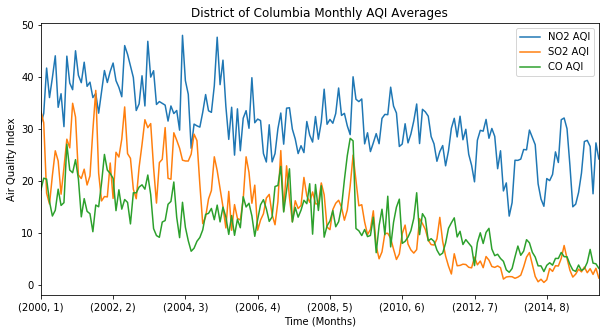

In [24]:
dcmean = dc.groupby(['year','month']).mean()
dcmean.plot(figsize=(10,5))
plt.title('District of Columbia Monthly AQI Averages')
plt.xlabel('Time (Months)')
plt.ylabel('Air Quality Index')
plt.savefig('Resources/dcmean.png')

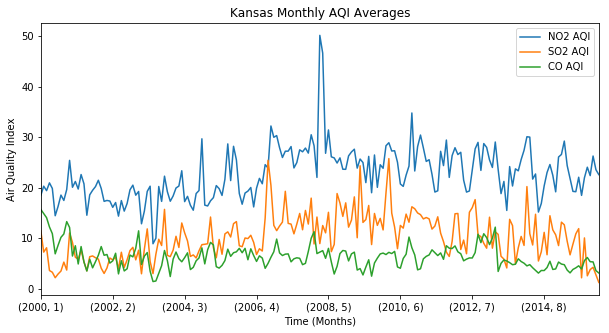

In [25]:
ksmean = ks.groupby(['year','month']).mean()
ksmean.plot(figsize=(10,5))
plt.title('Kansas Monthly AQI Averages')
plt.xlabel('Time (Months)')
plt.ylabel('Air Quality Index')
plt.savefig('Resources/ksmean.png')

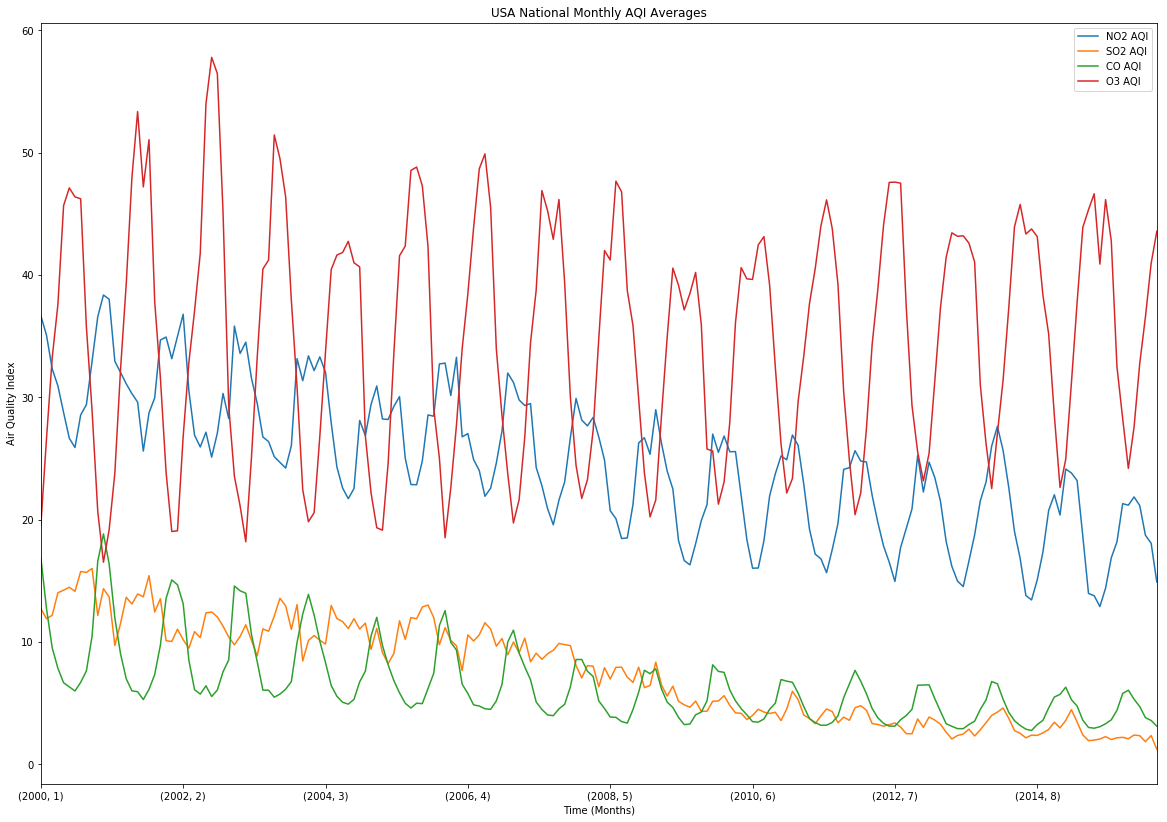

In [26]:
usmean = us.groupby(['year','month']).mean()
usmeanplot = usmean.plot(figsize = (20,14))
plt.title('USA National Monthly AQI Averages')
plt.xlabel('Time (Months)')
plt.ylabel('Air Quality Index')
plt.savefig('Resources/usmean.png')

In [36]:
ny9 = df[df.City=='New York'][["NO2 AQI","SO2 AQI","CO AQI","Date Local","year","month","day"
                   ]]
ny2 = ny9[ny9.year==2001][ny9.month >=8][ny9.month <=10]

C:\Users\sachs\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


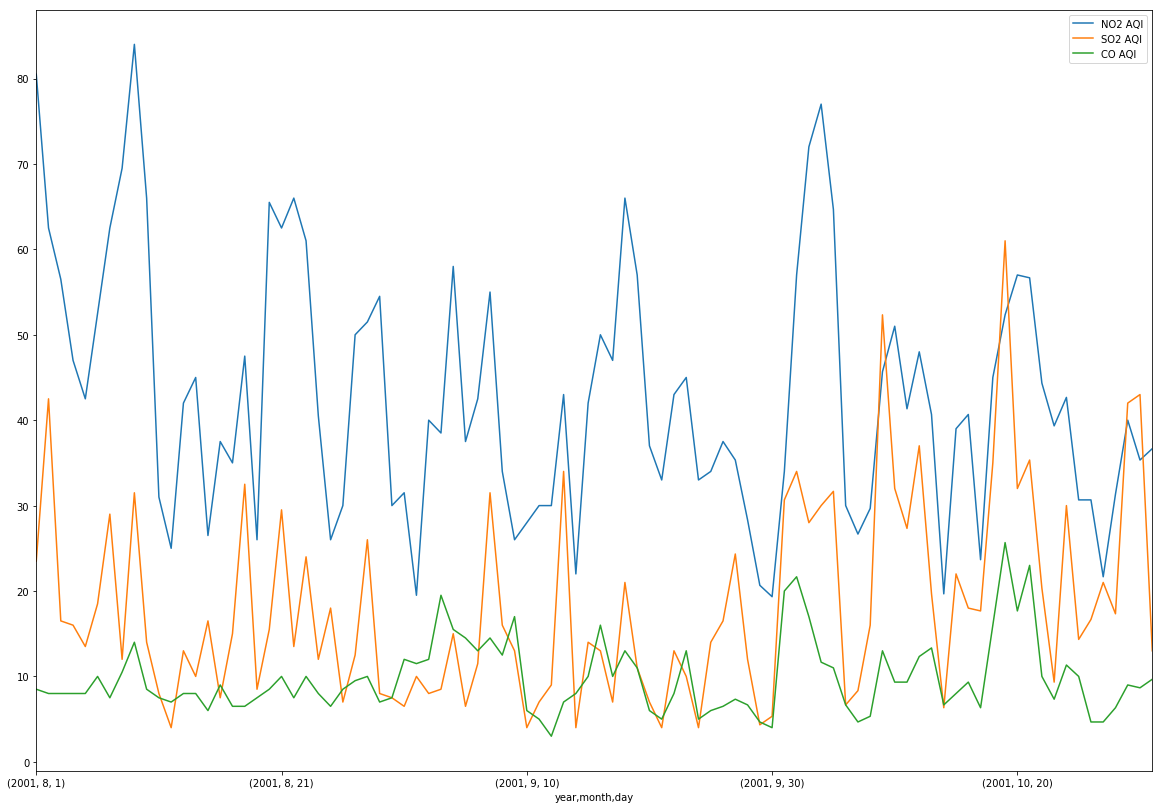

In [37]:
nyc = ny2.groupby(['year','month','day']).mean()
nycplot = nyc.plot(figsize = (20,14))